# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

In [79]:
import os
os.getcwd()

'c:\\Users\\Charan\\Desktop\\mini project'

In [80]:
os.chdir('c:\\Users\\Charan\\Desktop\\mini project')

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

## 1. Loading Data

The dataset is collected from open source platform

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).

The overview of this dataset is, it has 11054 samples with 32 features.

In [82]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv", skiprows=[1293, 1294])
#Ignored rows 1293,1294 as they were not in the correct format
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. EDA
In this step, few dataframe methods are used to look into the data and its features.

In [83]:
#Shape of dataframe

data.shape

(2469, 32)

In [84]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [85]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                2469 non-null   int64
 1   UsingIP              2469 non-null   int64
 2   LongURL              2469 non-null   int64
 3   ShortURL             2469 non-null   int64
 4   Symbol@              2469 non-null   int64
 5   Redirecting//        2469 non-null   int64
 6   PrefixSuffix-        2469 non-null   int64
 7   SubDomains           2469 non-null   int64
 8   HTTPS                2469 non-null   int64
 9   DomainRegLen         2469 non-null   int64
 10  Favicon              2469 non-null   int64
 11  NonStdPort           2469 non-null   int64
 12  HTTPSDomainURL       2469 non-null   int64
 13  RequestURL           2469 non-null   int64
 14  AnchorURL            2469 non-null   int64
 15  LinksInScriptTags    2469 non-null   int64
 16  ServerFormHandler    246

In [86]:
# nunique value in columns

data.nunique()

Index                  2469
UsingIP                   2
LongURL                   3
ShortURL                  2
Symbol@                   2
Redirecting//             2
PrefixSuffix-             2
SubDomains                3
HTTPS                     3
DomainRegLen              2
Favicon                   2
NonStdPort                2
HTTPSDomainURL            2
RequestURL                2
AnchorURL                 3
LinksInScriptTags         3
ServerFormHandler         3
InfoEmail                 2
AbnormalURL               2
WebsiteForwarding         2
StatusBarCust             2
DisableRightClick         2
UsingPopupWindow          2
IframeRedirection         2
AgeofDomain               2
DNSRecording              2
WebsiteTraffic            3
PageRank                  2
GoogleIndex               2
LinksPointingToPage       3
StatsReport               2
class                     2
dtype: int64

In [87]:
#droping index column

data = data.drop(['Index'],axis = 1)

OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Data Visualization
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

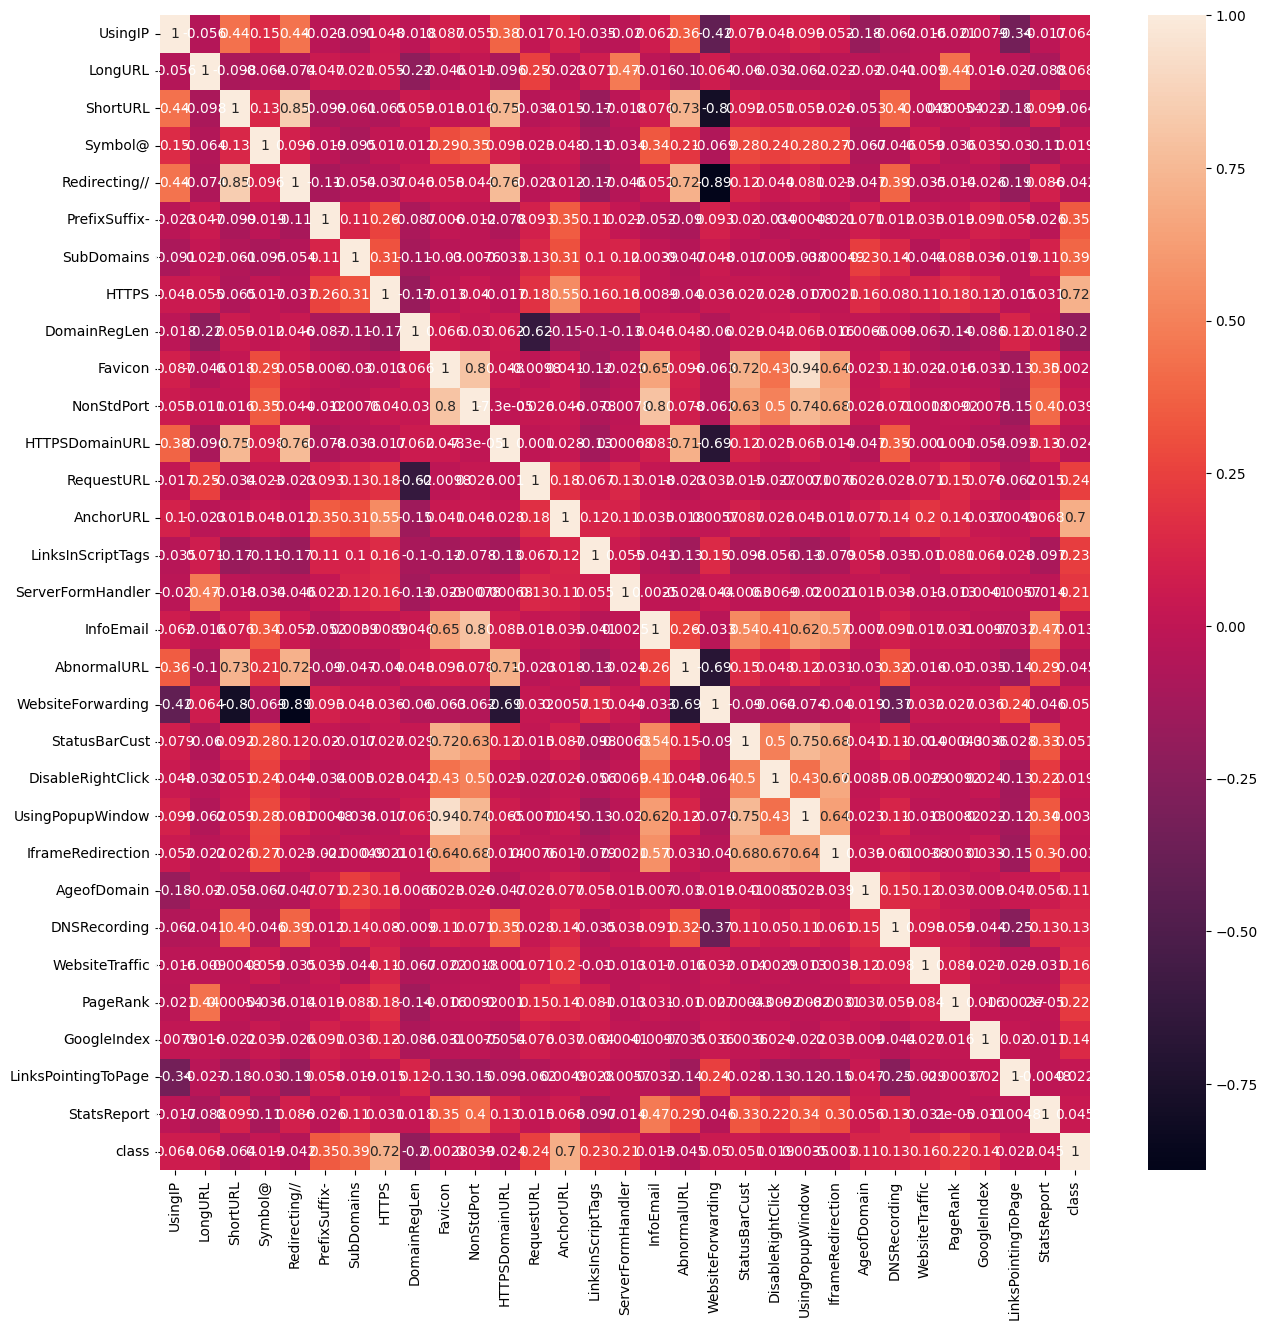

In [88]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

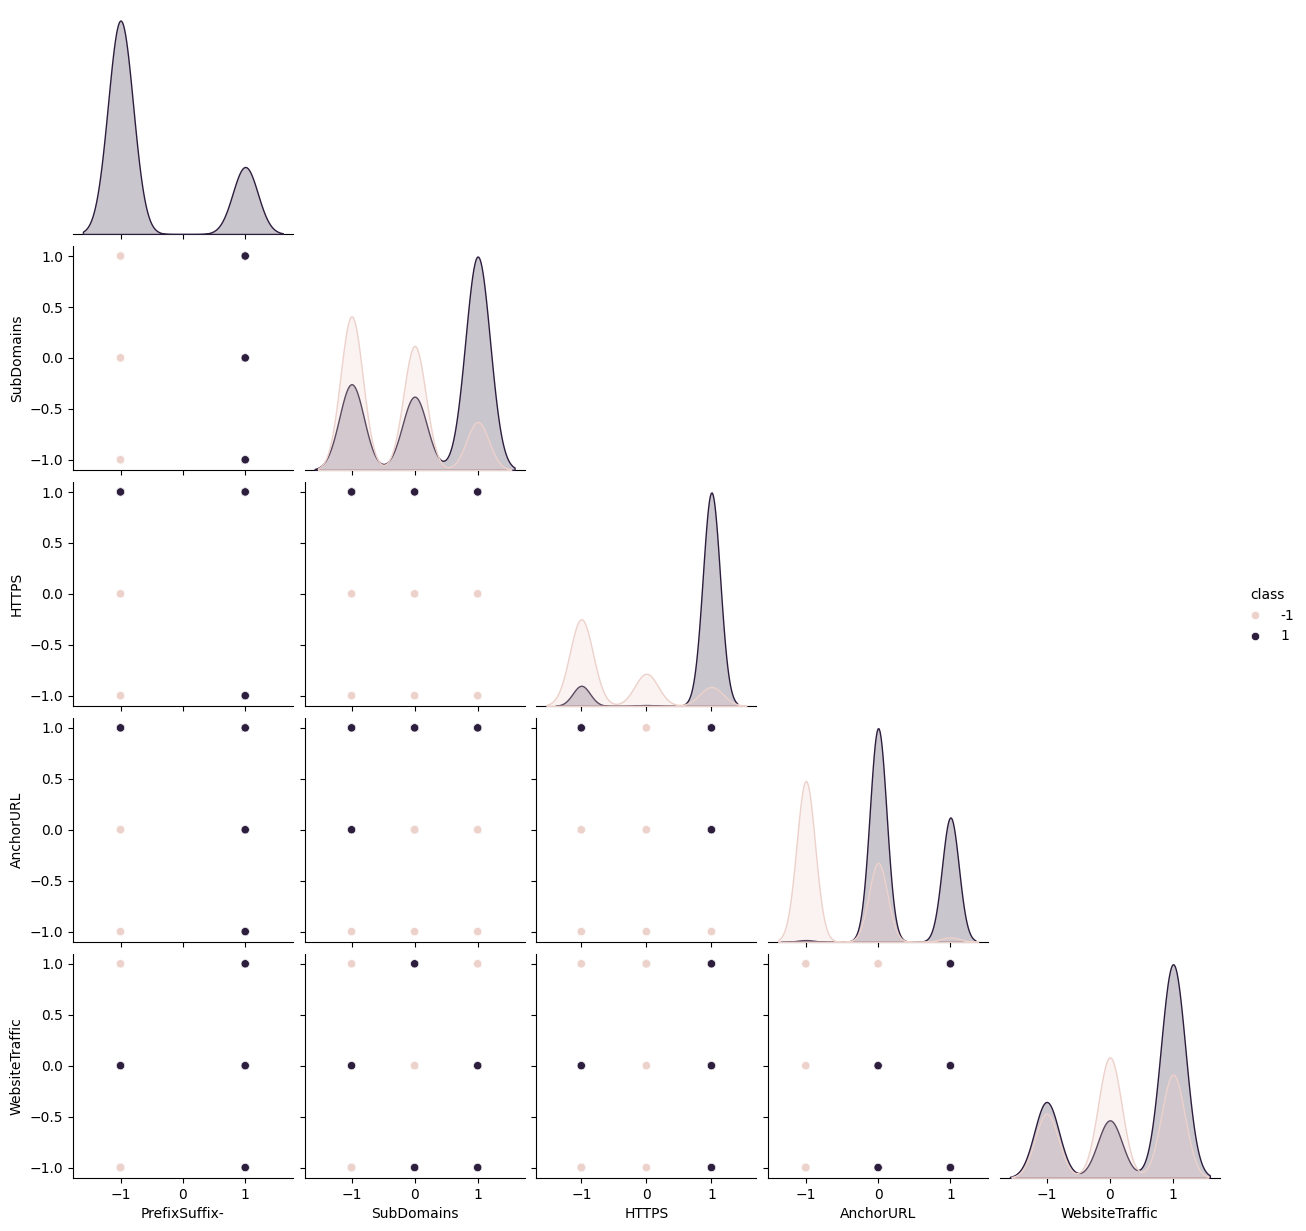

In [89]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


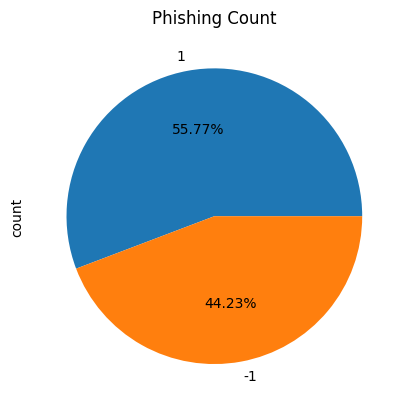

In [90]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Data Splitting
The data is split into train & test sets, 80-20 split.

In [91]:
y = data["class"]
y

0      -1
1      -1
2      -1
3       1
4       1
       ..
2464    1
2465   -1
2466   -1
2467   -1
2468   -1
Name: class, Length: 2469, dtype: int64

In [92]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
X

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
2465,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
2466,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
2467,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


In [93]:
# Splitting the dataset into train and test sets: 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1975, 30), (1975,), (494, 30), (494,))

## 5. Building and Training ML Model
   
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of Phising is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

## Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [94]:
# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [95]:
log.score(X_train,y_train)

0.9341772151898734

In [96]:
log.score(X_test,y_test)

0.9271255060728745

In [97]:
#predicting the target value from the model for the samples
y_pred = log.predict(X_test)
y_pred

array([-1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1

In [98]:
y_test.values

array([-1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1

In [99]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.91       211
           1       0.93      0.94      0.94       283

    accuracy                           0.93       494
   macro avg       0.93      0.92      0.93       494
weighted avg       0.93      0.93      0.93       494



In [100]:
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T,
            index=log.classes_,columns=log.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        -1    1
Predicted          
-1         192   17
 1          19  266


## KNN Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [101]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [102]:
knn.score(X_train,y_train)

0.9924050632911392

In [103]:
knn.score(X_test,y_test)

0.8967611336032388

In [104]:
#predicting the target value from the model for the samples
y_pred = knn.predict(X_test)
y_pred

array([-1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1,
        1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,
        1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1

In [105]:
y_test.values

array([-1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,
       -1, -1,  1,  1, -1

In [106]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.90      0.88       211
           1       0.92      0.89      0.91       283

    accuracy                           0.90       494
   macro avg       0.89      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494



In [107]:
from sklearn.metrics import confusion_matrix, classification_report

cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred).T,
            index=knn.classes_,columns=knn.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True        -1    1
Predicted          
-1         190   30
 1          21  253


# WORKING ON TESTING PHISHING URLS

In [108]:
test = pd.read_csv('testing.csv')
test.tail()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
195,195,1,1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,1,-1,1,1,1
196,196,1,-1,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,1,1,1
197,197,1,-1,1,1,1,-1,0,0,-1,...,1,1,1,1,-1,-1,-1,1,0,1
198,198,1,-1,1,1,1,1,1,1,-1,...,1,1,1,1,-1,1,-1,1,0,1
199,199,1,-1,1,1,1,-1,0,0,-1,...,1,1,1,1,-1,-1,-1,1,0,1


In [109]:
Index_test = test.Index


In [110]:
test = test.drop(['Index'],axis = 1)

In [111]:
knn.predict(test)

array([-1, -1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1], dtype=int64)

In [112]:
submission_predict=knn.predict(test)

In [113]:
submission=pd.DataFrame(data = {'Index':Index_test.values,'URL_status':submission_predict})

In [114]:
submission["URL_status"]=submission["URL_status"].map({1: "PHISHING", -1: "NO PHISHING"})

In [115]:
submission.to_csv('Sample_Submission.csv',index = False)

In [116]:
test_results = pd.read_csv('Sample_Submission.csv')
test_results

,Index,URL_status
0,0,NO PHISHING
1,1,NO PHISHING
2,2,NO PHISHING
3,3,PHISHING
4,4,PHISHING
...,...,...
195,195,PHISHING
196,196,NO PHISHING
197,197,NO PHISHING
198,198,PHISHING
